[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  28.299999  28.713333  28.114000  28.684000  28.684000  142981500
2020-01-03  29.366667  30.266666  29.128000  29.534000  29.534000  266677500
2020-01-06  29.364668  30.104000  29.333332  30.102667  30.102667  151995000
2020-01-07  30.760000  31.441999  30.224001  31.270666  31.270666  268231500
2020-01-08  31.580000  33.232666  31.215334  32.809334  32.809334  467164500
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


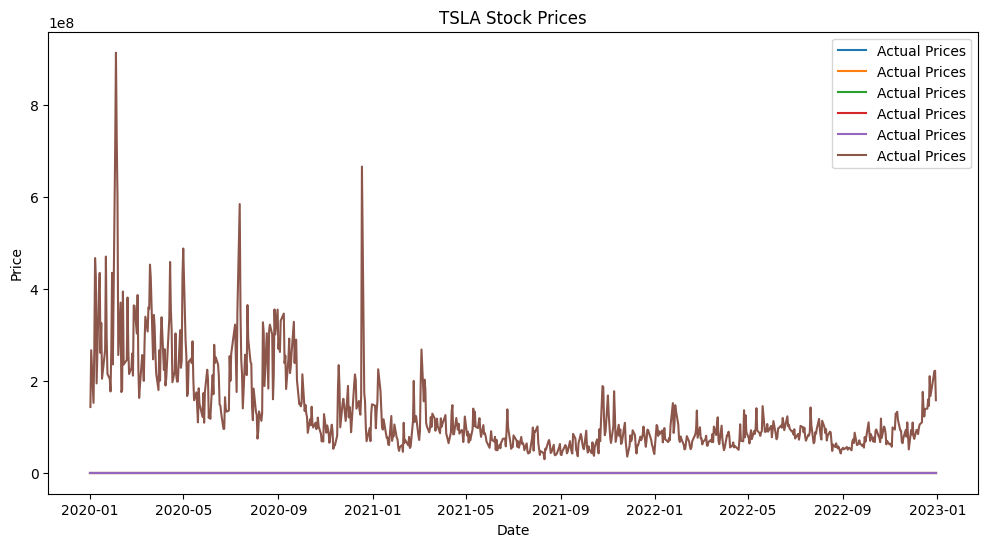

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10, 6)]              0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 10, 1)]              0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 10, 50)               11400     ['input_1[0][0]']             
                                                                                                  
 lstm_3 (LSTM)               (None, 10, 50)               10400     ['input_2[0][0]']             
                                                                                              

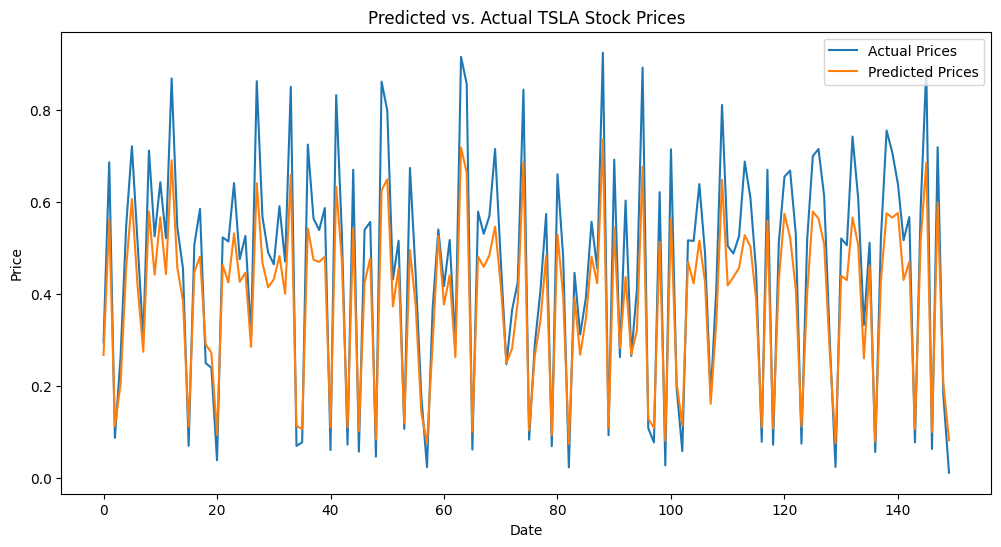

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, concatenate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from keras.layers import concatenate
from keras.models import Model
from keras.models import Model
from keras.layers import Input, concatenate, Dense


# Define the stock symbol and date range
stock_symbol = "TSLA"
start_date = "2020-01-01"
end_date = "2023-01-01"

# Download historical stock price data using yfinance
df = pd.read_csv('/Users/pavitrasrivastava/Desktop/pandas/TSLA.csv')
data = yf.download(stock_symbol, start=start_date, end=end_date)


print(data.head())
print(data.columns)


# Extract the 'Close' prices
data = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Plot the historical stock prices
plt.figure(figsize=(12, 6))
plt.title(f'{stock_symbol} Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], label='Actual Prices')
plt.legend()
plt.show()

# Preprocess the data manually
selected_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Loop through each column and scale it to the range [0, 1]
for column in selected_columns:
    min_value = data[column].min()
    max_value = data[column].max()
    data[column] = (data[column] - min_value) / (max_value - min_value)




# Define a function to create sequences of data for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

# Choose the sequence length (number of past days to use for prediction)
sequence_length = 10

# Create sequences and targets
sequences, targets = create_sequences(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values, sequence_length)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

# Calculate the number of samples and features
num_samples, sequence_length, num_features = sequences.shape

# Create input layers for each branch
input_layer1 = Input(shape=(sequence_length, num_features))
input_layer2 = Input(shape=(sequence_length, 1))  # Second branch with single feature

# LSTM branch 1
lstm1 = LSTM(50, return_sequences=True)(input_layer1)
lstm1 = LSTM(50, return_sequences=True)(lstm1)
lstm1 = LSTM(50)(lstm1)

# LSTM branch 2
lstm2 = LSTM(50, return_sequences=True)(input_layer2)
lstm2 = LSTM(50, return_sequences=True)(lstm2)
lstm2 = LSTM(50)(lstm2)

# Concatenate the outputs from both branches
concatenated = concatenate([lstm1, lstm2])

# Add output layer
output = Dense(1)(concatenated)  # Assuming you want to predict a single value

# Create the model
model = Model(inputs=[input_layer1, input_layer2], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use an appropriate loss function

# Check the model summary to confirm the names of your LSTM layers
print(model.summary())




# Replace lstm1_index and lstm2_index with the correct integer indices of your LSTM layers
lstm1_index = 2  # For example, if lstm_217 is the first LSTM layer, its index is 0
lstm2_index = 3  # For example, if lstm_220 is the second LSTM layer, its index is 1

# Concatenate the outputs of the LSTM layers
merged = concatenate([model.layers[lstm1_index].output, model.layers[lstm2_index].output], axis=1)

# Continue with your model architecture






# Additional Dense layers
merged = Dense(64, activation='relu')(merged)
merged = Dense(1)(merged)
# Define the input layers
input_layer1 = Input(shape=(sequence_length, 5))  # Adjust number_of_features1 as needed
input_layer2 = Input(shape=(sequence_length, 10))  # Adjust number_of_features2 as needed

# Define the final output layer
final_output = Dense(1)(merged)  # Assuming you want to predict a single value

# Merge the two LSTM branches
merged = concatenate([model.layers[4].output, model.layers[5].output], axis=-1)  # Concatenate the last LSTM layers

# Additional Dense layers
merged = Dense(64, activation='relu')(merged)

# Output layer
final_output = Dense(1)(merged)  # Assuming you want to predict a single value

# Define the final model with the specified inputs and outputs
final_model = Model(inputs=[model.layers[0].input, model.layers[3].input], outputs=final_output)

# Compile the final model
final_model.compile(optimizer='adam', loss='mean_squared_error')


# Load and preprocess your test data similar to how you did it for training data
# Make sure to scale your test data using the same scaler used for training data

# Load your test data DataFrame (replace 'test_data.csv' with the actual file path)
test_data = pd.read_csv('/Users/pavitrasrivastava/Desktop/pandas/TSLA.csv')

# Extract the columns you need for input
test_data_input1 = test_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values

print(test_data_input1.shape)
# Assuming you have loaded and preprocessed your test data as test_data_input1
# First, get the number of samples in your test data
num_samples = test_data_input1.shape[0]

# Calculate the number of sequences
num_sequences = num_samples // sequence_length

test_data_input1 = test_data_input1.reshape((456,6))

# Now, you should have the correct shape for your test data

# Define your model architecture, including LSTM layers and other layers

# Example LSTM layers for input_layer1
lstm_layer1 = LSTM(50, return_sequences=True)(input_layer1)
lstm_layer2 = LSTM(50)(lstm_layer1)

# Example LSTM layers for input_layer2
lstm_layer3 = LSTM(50, return_sequences=True)(input_layer2)
lstm_layer4 = LSTM(50)(lstm_layer3)

# Merge the two LSTM branches
merged = concatenate([lstm_layer2, lstm_layer4], axis=-1)

# Additional Dense layers if needed
dense_layer = Dense(64, activation='relu')(merged)

# Final output layer
final_output = Dense(1)(dense_layer)  # Adjust this as needed

# Define the final model with the specified inputs and outputs
final_model = Model(inputs=[input_layer1, input_layer2], outputs=final_output)

# Compile the final model
final_model.compile(optimizer='adam', loss='mean_squared_error')

# Define your model architecture, including LSTM layers and other layers

# Example LSTM layers for input_layer1
lstm_layer1 = LSTM(50, return_sequences=True)(input_layer1)
lstm_layer2 = LSTM(50)(lstm_layer1)

# Example LSTM layers for input_layer2
lstm_layer3 = LSTM(50, return_sequences=True)(input_layer2)
lstm_layer4 = LSTM(50)(lstm_layer3)

# Merge the two LSTM branches
merged = concatenate([lstm_layer2, lstm_layer4], axis=-1)

# Additional Dense layers if needed
dense_layer = Dense(64, activation='relu')(merged)

# Final output layer
final_output = Dense(1)(dense_layer)  # Adjust this as needed

# Define the final model with the specified inputs and outputs
final_model = Model(inputs=[input_layer1, input_layer2], outputs=final_output)

# Compile the final model
final_model.compile(optimizer='adam', loss='mean_squared_error')



# Define the number of features for each input
num_features1 = 6  # Number of features for input_layer1
num_features2 = 1  # Number of features for input_layer2

# Define your input layers
input_layer1 = Input(shape=(sequence_length, num_features1))
input_layer2 = Input(shape=(sequence_length, num_features2))



# Preprocess the data manually
selected_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Loop through each column and scale it to the range [0, 1]
scaler = MinMaxScaler()  # Create a scaler object
data[selected_columns] = scaler.fit_transform(data[selected_columns])  # Fit and transform the data

# Define a function to create sequences of data for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)



# Similarly, create X_test_input1 and X_test_input2 for the test data
X_test_input1 = X_test
X_test_input2 = X_test[:, :, -1]  # Select the last feature column



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)



# Choose the sequence length (number of past days to use for prediction
sequence_length = 10

# Create sequences and targets
sequences, targets = create_sequences(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values, sequence_length)
# Define X_train_input1 as X_train
X_train_input1 = X_train

# Define X_train_input2 by selecting the appropriate column from X_train
X_train_input2 = X_train[:, :, -1]  # Select the last feature column

# Calculate the number of samples and features
num_samples, sequence_length, num_features = sequences.shape


# Train the model
model.fit([X_train_input1, X_train_input2], y_train, epochs=50, batch_size=32, verbose=1)



# Fit the scaler on the original data
scaler.fit(data[selected_columns])  # Use the same columns as during preprocessing

# Reshape y_test to match the shape of y_pred
y_test = y_test[:, 0]  # Assuming you want to use the first column of y_test




# Evaluate the model
y_pred = model.predict([X_test_input1, X_test_input2])
# Reshape y_pred to be a two-dimensional array with shape (num_samples, 1)
y_pred = y_pred.reshape(-1, 1)

print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)





# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_pred, y_test)
print(f"Mean Squared Error: {mse}")

# Reshape y_pred and y_test


# Load and fit the scaler on the original data (same columns as during preprocessing)
scaler = MinMaxScaler()
scaler.fit(data[selected_columns])



# Reshape y_test if it's a 2D array
if len(y_test.shape) == 2:
    y_test = y_test[:, 0]  # Assuming you want to use the first column of y_test
    
y_test = y_test.reshape(-1, 1)  # Reshape to a 2D array with a single feature column

print("Shape of y_test before reshaping:", y_test.shape)









# Plot the predicted vs. actual stock prices
plt.figure(figsize=(12, 6))
plt.title(f'Predicted vs. Actual {stock_symbol} Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.legend()
plt.show()
